##Fingerprint Similarity - with and without hydrogens

In [1]:
from rdkit import Chem
from rdkit import Chem,DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
print rdBase.rdkitVersion
%pylab inline

2015.09.2
Populating the interactive namespace from numpy and matplotlib


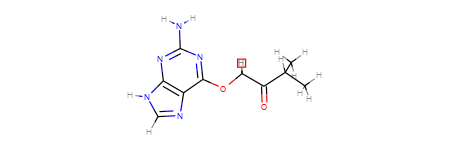

In [2]:
cdk2 = [x for x in Chem.SDMolSupplier('C:\RDKit_2015_09_2\Docs\Book\data\cdk2.sdf',removeHs=False) if x is not None]
cdk2[0]

###Similarity Distribution of PatternFingerprint with Hydrogens

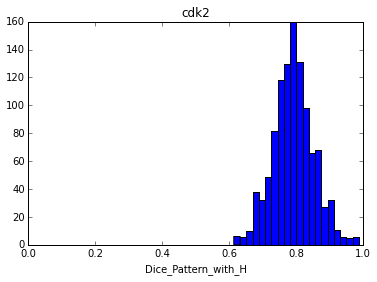

In [3]:
pattern_fps = [Chem.rdmolops.PatternFingerprint(x,fpSize=2048) for x in cdk2]
pattern_ds = []
for i in range(0,len(pattern_fps)):
    for j in range(i+1,len(pattern_fps)):
        pattern_ds.append(DataStructs.DiceSimilarity(pattern_fps[i],pattern_fps[j]))
_=hist(pattern_ds,bins=20)
xlim((0,1.0))
xlabel('Dice_Pattern_with_H')
_=title('cdk2')

###Similarity Distribution of PatternFingerprint without Hydrogens

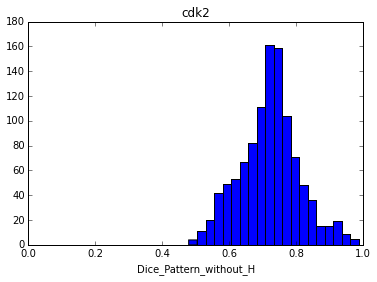

In [4]:
cdk2_no_H = [Chem.rdmolops.RemoveHs(x) for x in cdk2]
pattern_fps = [Chem.rdmolops.PatternFingerprint(x,fpSize=2048) for x in cdk2_no_H]
pattern_ds = []
for i in range(0,len(pattern_fps)):
    for j in range(i+1,len(pattern_fps)):
        pattern_ds.append(DataStructs.DiceSimilarity(pattern_fps[i],pattern_fps[j]))
_=hist(pattern_ds,bins=20)
xlim((0,1.0))
xlabel('Dice_Pattern_without_H')
_=title('cdk2')

###Similarity Distribution of RDKitFingerprint with Hydrogens

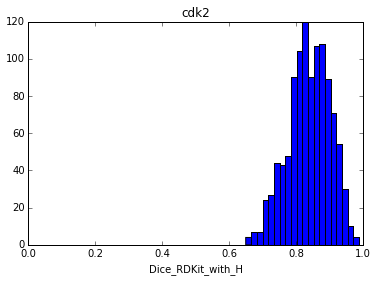

In [5]:
rdkit_fps = [Chem.rdmolops.RDKFingerprint(x,fpSize=2048) for x in cdk2]
rdkit_ds = []
for i in range(0,len(rdkit_fps)):
    for j in range(i+1,len(rdkit_fps)):
        rdkit_ds.append(DataStructs.DiceSimilarity(rdkit_fps[i],rdkit_fps[j]))
_=hist(rdkit_ds,bins=20)
xlim((0,1.0))
xlabel('Dice_RDKit_with_H')
_=title('cdk2')

###Similarity Distribution of RDKitFingerprint without Hydrogens

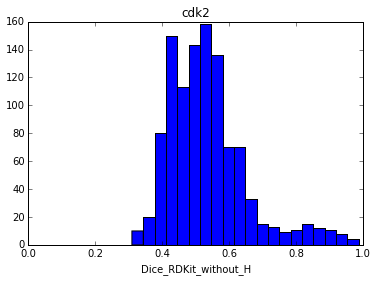

In [6]:
rdkit_fps = [Chem.rdmolops.RDKFingerprint(x,fpSize=2048) for x in cdk2_no_H]
rdkit_ds = []
for i in range(0,len(rdkit_fps)):
    for j in range(i+1,len(rdkit_fps)):
        rdkit_ds.append(DataStructs.DiceSimilarity(rdkit_fps[i],rdkit_fps[j]))
_=hist(rdkit_ds,bins=20)
xlim((0,1.0))
xlabel('Dice_RDKit_without_H')
_=title('cdk2')